In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
df = pd.read_csv('E:\\Assignment\\Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## Basic Data Expolaration

In [3]:
print(f'The Number of rows in the dataset is {df.shape[0]}')
print(f'The Number of columns in the dataset is {df.shape[1]}')
print(f'The data types for each column in the dataset is\n {df.dtypes}')
print(f'The missing values for each column in the dataset is \n {df.isnull().sum()}')

The Number of rows in the dataset is 148654
The Number of columns in the dataset is 13
The data types for each column in the dataset is
 Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object
The missing values for each column in the dataset is 
 Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


## Descriptive Statistics

In [4]:
df.describe()

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Status
count,148654.000000,148045.000000,148650.000000,148650.000000,112491.000000,148654.000000,148654.000000,148654.000000,0.0,0.0
mean,74327.500000,66325.448840,5066.059886,3648.767297,25007.893151,74768.321972,93692.554811,2012.522643,NaN,NaN
std,42912.857795,42764.635495,11454.380559,8056.601866,15402.215858,50517.005274,62793.533483,1.117538,NaN,NaN
min,1.000000,-166.010000,-0.010000,-7058.590000,-33.890000,-618.130000,-618.130000,2011.000000,NaN,NaN
25%,37164.250000,33588.200000,0.000000,0.000000,11535.395000,36168.995000,44065.650000,2012.000000,NaN,NaN
50%,74327.500000,65007.450000,0.000000,811.270000,28628.620000,71426.610000,92404.090000,2013.000000,NaN,NaN
75%,111490.750000,94691.050000,4658.175000,4236.065000,35566.855000,105839.135000,132876.450000,2014.000000,NaN,NaN
max,148654.000000,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000,NaN,NaN


## Data Cleaning

In [5]:
df_cleaning = df.drop(['Notes', 'Status'], axis=1)   # we remove Notes and status columns because all values is Null Values.

In [6]:
# will fill null values with 0 in columns pay & Benefits because null value doesn't effect on total pay and total pay benefits.
df_cleaning_1 = df_cleaning.fillna(0)   

In [7]:
df_cleaning_1.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011,San Francisco


## Basic Data Visualization

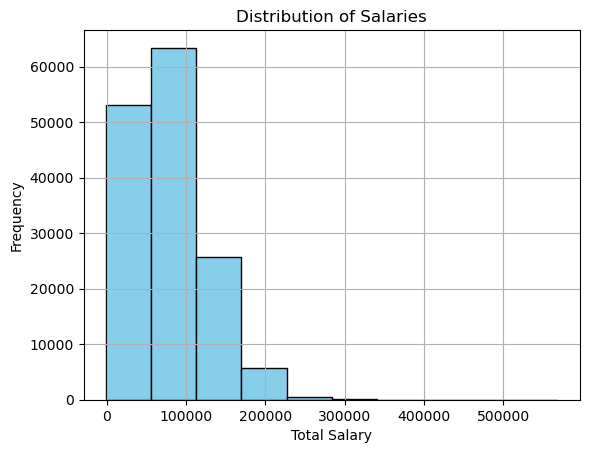

In [8]:
plt.hist(df_cleaning_1['TotalPay'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

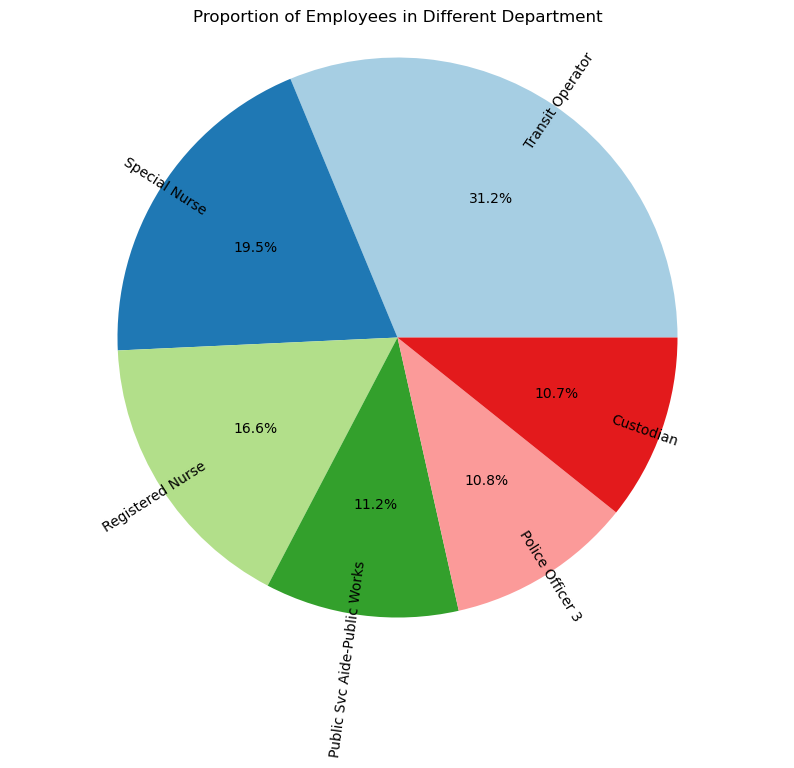

In [77]:
department_counts = df_cleaning_1['JobTitle'].value_counts().head(6)  # Considering the top 6 departments
plt.figure(figsize=(10, 8))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors,labeldistance=0.8,
       rotatelabels=True,)
plt.title('Proportion of Employees in Different Department')
plt.axis('equal')
plt.show()

## Grouped Analysis

In [100]:
average_salary_per_year_jobtitle = df_cleaning_1.groupby(['Year','JobTitle'])['TotalPay'].mean().sort_values(ascending=False)

In [101]:
print(f'Average Salary per job title and Year is \n{average_salary_per_year_jobtitle}')

Average Salary per job title and Year is 
Year  JobTitle                                      
2011  GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY    399211.275
2014  Chief Investment Officer                          339653.700
2013  Chief of Police                                   339282.070
      Chief, Fire Department                            336922.010
2014  Chief of Police                                   326716.760
                                                           ...    
2013  Public Safety Comm Tech                                0.000
      IS Operator-Journey                                    0.000
      Drug Court Coordinator                                 0.000
2014  Special Assistant 15                                   0.000
      Not provided                                           0.000
Name: TotalPay, Length: 4137, dtype: float64


## Simple Correlation Analysis

In [103]:
df_correlation = df_cleaning_1.iloc[:, 3:10].corr()

In [104]:
print(f'The correlation the features with the salary column \n {df_correlation}')

The correlation the features with the salary column 
                    BasePay  OvertimePay  OtherPay  Benefits  TotalPay  \
BasePay           1.000000     0.268128  0.281796  0.654153  0.954693   
OvertimePay       0.268128     1.000000  0.316595  0.226173  0.504860   
OtherPay          0.281796     0.316595  1.000000  0.160344  0.470499   
Benefits          0.654153     0.226173  0.160344  1.000000  0.632202   
TotalPay          0.954693     0.504860  0.470499  0.632202  1.000000   
TotalPayBenefits  0.946864     0.467984  0.422345  0.781963  0.977313   
Year              0.030829     0.027870 -0.002515  0.461408  0.032090   

                  TotalPayBenefits      Year  
BasePay                   0.946864  0.030829  
OvertimePay               0.467984  0.027870  
OtherPay                  0.422345 -0.002515  
Benefits                  0.781963  0.461408  
TotalPay                  0.977313  0.032090  
TotalPayBenefits          1.000000  0.151947  
Year                      0.1519

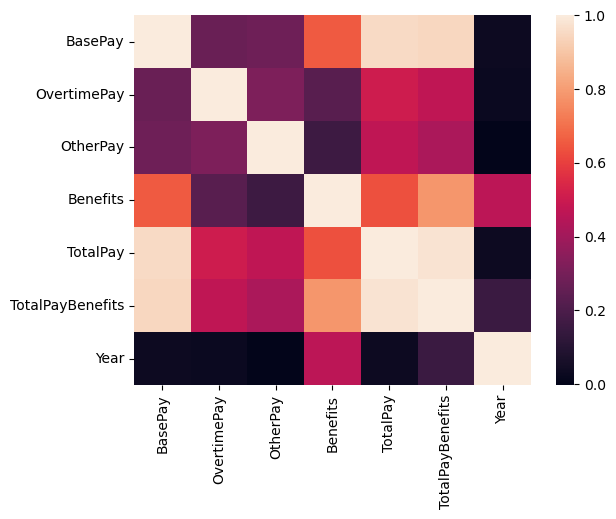

In [106]:
sns.heatmap(df_correlation)
plt.show()

## Summary of Insights

##### I found out that Average salary is high in year 2011 and job title for employer is General Manager.
##### I found out that all features are correlated with salary with strong correlation and medium correlation.
#####  I found out that transit operator is high probabillity in different departments in according to Pie chart.